# Worksheet 08

Name: I-Ju Lin  
UID: U05295432 

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
| ---- | ------------ |
| A  B | Disagree     |
| A  C | Agree        |
| A  D | Agree        |
| A  E | Agree        |
| B  C | Disagree     |
| B  D | Agree        |
| B  E | Agree        |
| C  D | Agree        |
| C  E | Agree        |
| D  E | Disagree     |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

$\sum_{x,y}{\mathbb{I}_{P,C}(x, y)}$ where $\mathbb{I}_{P,C}(x, y) = 1$ if P and C  are disagree on the clustering way of the pair, otherwise $0$.

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

Disagreement between P_0 and P_1: 3 * 2 = 6.  
Disagreement between P_0 and P_2: 3 * 4 = 12.  
Disagreement between P_1 and P_2: 2 * 4 = 8.  

Totally 26 disagreements.

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

Agreement within P_0: 3 pairs.  
Agreement within P_0: (2 * 1) / 2 = 1 pairs.  
Agreement within P_0: (4 * 3) / 2 = 6 pairs.  

Totally 10 agreements. As a dataset with 9 points, total possible pairs are (9 * 8) / 2 = 36.  
If we know there's 10 agreements, there must be another (36 - 10) = 26 disagreements.


e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

Calculate agreements as the sum of numbers of pairs within each cluster, then the disagreement distances will be the total possible pairs in the dataset minus the amount of agreements.

D = total_pairs - sum(pairs_within_each_cluster)

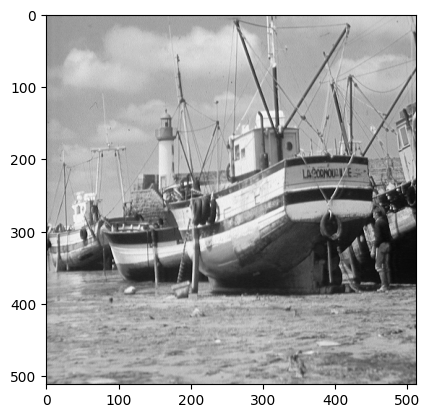

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

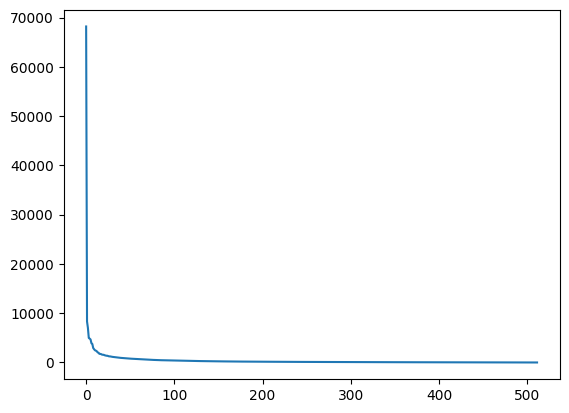

In [2]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(s)

Notice you can get the image back by multiplying the matrices back together:

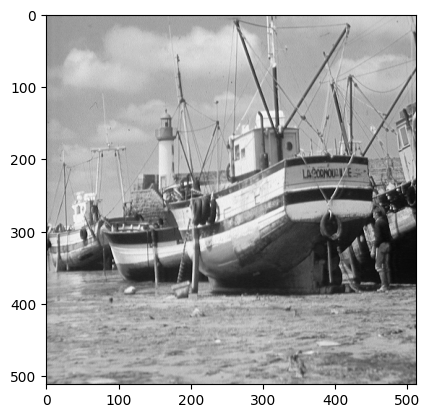

In [3]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [4]:
s[0] = 0
scopy = s

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

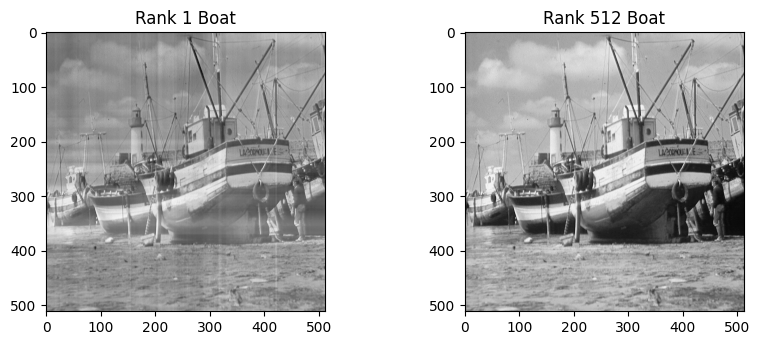

In [5]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

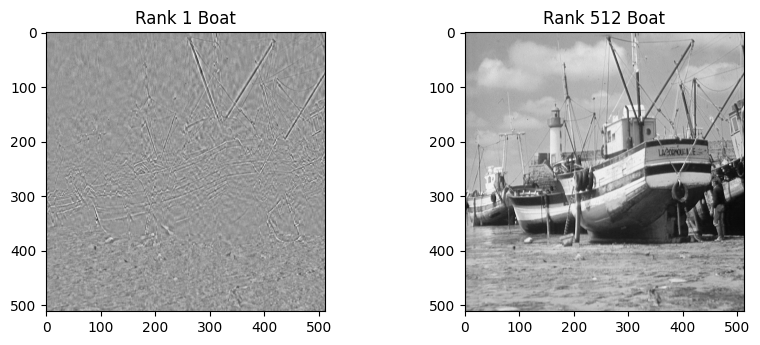

In [6]:
s[:40] *= 0

scopy = s
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

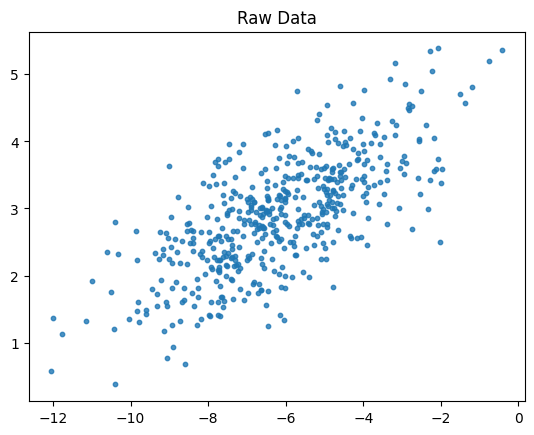

In [7]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

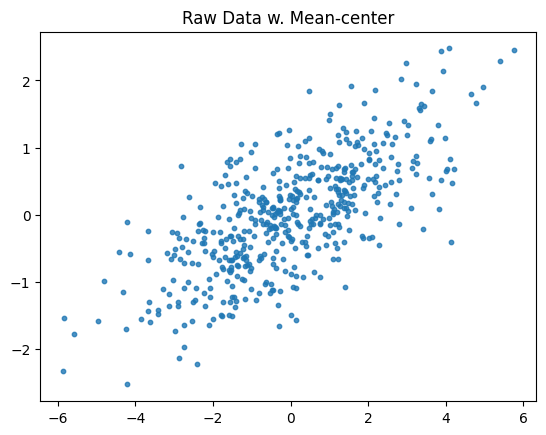

In [8]:
mean_center = np.mean(X, axis=0) # [np.mean(X[:, 0]), np.mean(X[:, 1])]
X[:, 0] -= mean_center[0]
X[:, 1] -= mean_center[1]
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data w. Mean-center")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [9]:
# Reference: https://gist.github.com/anonymous/7d888663c6ec679ea65428715b99bfdd
U, Sigma, Vh=np.linalg.svd(X, full_matrices=False, compute_uv=True)

As my expectation, there should be two singular values. Because two dimensional data should have two eigenvectors when these two dimensions are independent.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

It'll be the slop of the C, because our X is sampled by random numbers doing a matrix multiplication to C. Another choice would be the vector perpendicular to the slop from the sample variance.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

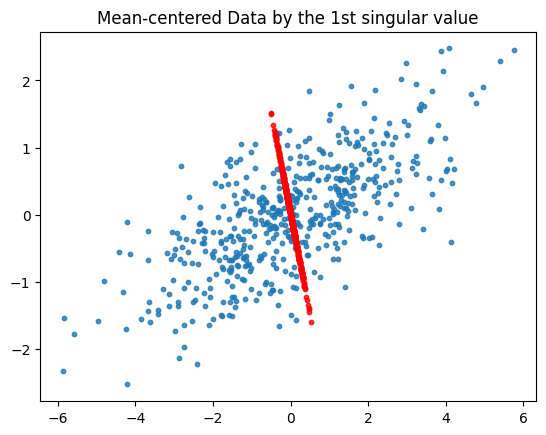

In [10]:
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)

U, Sigma, Vh=np.linalg.svd(X, full_matrices=False, compute_uv=True)
Sigma[0] *= 0
Approx_x = np.dot(U, np.diag(Sigma)).dot(Vh)
plt.scatter(Approx_x[:, 0] , Approx_x[:, 1], s=10, alpha=0.8, color="red")

plt.title("Mean-centered Data by the 1st singular value")
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

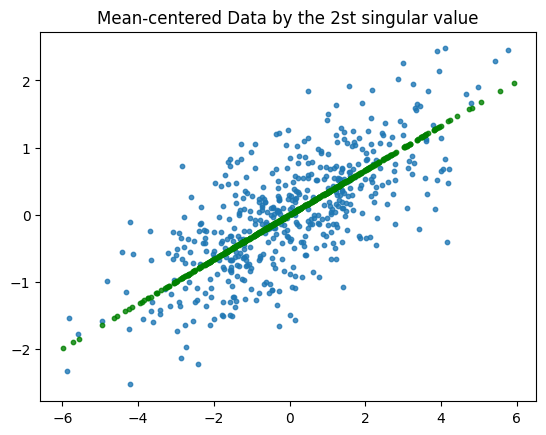

In [11]:
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)

U, Sigma, Vh=np.linalg.svd(X, full_matrices=False, compute_uv=True)
Sigma[1] *= 0
Approx_y = np.dot(U, np.diag(Sigma)).dot(Vh)
plt.scatter(Approx_y[:, 0] , Approx_y[:, 1], s=10, alpha=0.8, color="green")

plt.title("Mean-centered Data by the 2st singular value")
plt.show()